# **Market Campaign Analysis Project**

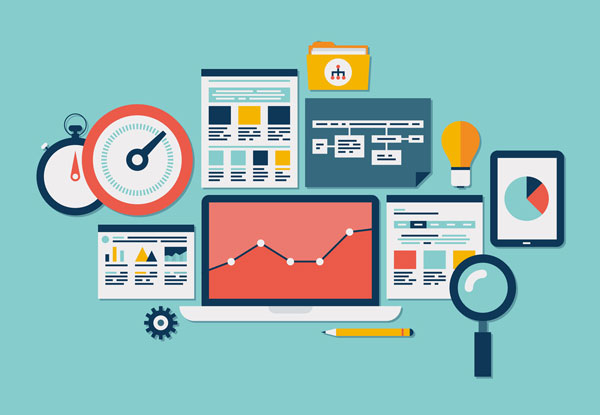

# **Overview of the notebook**



**1. Understanding the Dataset**    
*   Dataset Description
*   Population and Sample

**2. Data Cleaning**


*   Handling Missing Values
*   Removing Unwanted Columns
*   Correcting Data Types

**3. Encoding Categorical Variables**

*   Use One-Hot Encoding for categorical variables.
*   Use Label Encoding for categorical variables.


**4. Exploratory Data Analysis (EDA)**

*   Univariate Analysis
*   Bivariate Analysis

**5. Data Preprocessing**

*   Feature Scaling
*   Splitting the Data

**6. Predictive Analytics & Forecasting**

*   Model Selection
*   Training the Model
*   Model Comparison
*   Evaluate the best Model


**7. Predicting on Test Data**

*   Handling Feature Names Issue
*   Making Predictions
*   Output of Predictions


**8. Prescriptive Analytics & Optimization**


*   Prescriptive Solutions
*   Implementation of Prescriptive Method
*   Decision-Making & Evaluation


# **1. Understand the Dataset**

---




## **Dataset Description**
### The Marketing Campaign Dataset contains various attributes related to customer interactions and responses to marketing campaigns. This analysis uses two datasets **'train_df'** and **'test_df'** , which contain detail information about customers and their interations with a marketing campaign.

### **Features**

1.**id:** Unique identifier for each record.

2.**target:** Indicates whether the customer responded positively to the campaign.

3.**day:** The day of contact in the previous campaign.

4.**month:** The month of contact in the previous campaign.

5.**duration:** The duration of the contact in the previous campaign.

6.**contactId:** Unique identifier for the contact.

7.**age:** Age of the customer.

8.**gender:** Gender of the customer.

9.**job:** Occupation of the customer.

10.**maritalStatus:** Marital status of the customer.

11.**education:** Educational degree of the customer.

12.**creditFailure:** Indicates if the customer has defaulted on credit.

13.**accountBalance:** Balance in the customer's account.

14.**house:** Indicates if the customer owns a house.

15.**credit:** Indicates if the customer has a credit.

16.**contactType:** The medium of contact.

17.**numberOfContacts:** Number of contacts during the current campaign.

18.**daySinceLastCampaign:** Days since the last contact of the previous campaign.

19.**numberOfContactsLastCampaign:** Number of contacts during the previous campaign.

20.**lastCampaignResult**: Result of the previous campaign.



### **Target Variable**



* "target" column is the primary target variable in this analysis.This variable indicates whether a customer reponded positively to the marketing campaign. The main goal in this analysis is to predict customer responses and get actionable insights that can helps to optimize marketing
 efforts.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import Datasets

In [2]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')


**Checking first 5 rows in train dataset**

In [3]:
train_df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


**Checking last 5 rows in the train dataset**

In [4]:
train_df.tail()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
31475,432184725,yes,30,nov,1628,69542367,58,female,technical,married,highSchool,no,3399,no,no,landline,2,188.0,8,success
31476,432147139,no,21,may,173,69542565,40,female,manager,single,secondarySchool,no,858,yes,no,unknown,1,NaN,0,unknown
31477,432166958,no,17,nov,422,69543453,51,female,worker,married,highSchool,no,1414,yes,no,unknown,3,186.0,2,failure
31478,432166312,no,29,aug,69,69544121,30,male,technical,married,uniGraduated,no,1,no,no,cellPhone,21,NaN,0,unknown
31479,432171709,no,2,feb,171,69546604,50,male,technical,divorced,highSchool,no,8,no,no,cellPhone,2,5.0,1,other


**Checking how many rows are in the train dataset**

In [5]:
train_df.shape

(31480, 20)

* Rows = 31480
* Columns = 20



**Checking first 5 rows in the test dataset**

In [6]:
test_df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432176974,NaN,5,may,283,69546777,35,male,manager,married,uniGraduated,no,76,no,no,cellPhone,1,362.0,9,failure
1,432157692,NaN,18,jul,111,69546887,31,male,manager,married,uniGraduated,no,557,yes,no,cellPhone,1,NaN,0,unknown
2,432170850,NaN,29,jan,475,69550874,26,male,technical,single,uniGraduated,no,1274,no,no,landline,2,NaN,0,unknown
3,432151613,NaN,5,jun,209,69560082,26,male,worker,married,highSchool,no,986,yes,no,unknown,3,NaN,0,unknown
4,432167744,NaN,18,nov,459,69561716,32,male,worker,single,highSchool,no,3845,yes,no,cellPhone,3,NaN,0,unknown


**Checking last 5 rows in the test dataset**

In [7]:
test_df.tail()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
13726,432162117,NaN,8,aug,137,99980851,52,male,worker,married,highSchool,no,409,no,no,cellPhone,2,NaN,0,unknown
13727,432173177,NaN,9,feb,152,99986509,49,female,worker,married,secondarySchool,no,474,yes,yes,landline,3,221.0,1,failure
13728,432159672,NaN,28,jul,66,99993484,51,female,manager,married,uniGraduated,no,57,no,no,cellPhone,19,NaN,0,unknown
13729,432147170,NaN,21,may,253,99994990,41,male,manager,married,uniGraduated,no,666,yes,no,unknown,3,NaN,0,unknown
13730,432184830,NaN,11,dec,166,99997032,79,female,retired,married,secondarySchool,no,3025,no,no,cellPhone,3,126.0,3,other


**Checking how many rows are in the test dataset**

In [8]:
test_df.shape

(13731, 20)

*   Rows = 13731
*   Columns = 20



## **Population and Sample**




**Population**
* The "population"  refers to the entire of individuals who might be potentially targeted by the marketing campaigns of the supermarket. This includes all current customers as well as the potential customers of the supermarket.

**Sample**
* The "sample" refers to the specific subset of individuals whose data has been collected and included in the dataset. It will comprise all customers who have responded to earlier marketing campaigns, along with demographic information and other purchasing behaviors.

**Generalizability of insights across a broader population of customers the Dataset**

* There are several aspects related to ensuring that the insights from a dataset can be generalized to a larger population. First is the representativeness of the sample which avoids biases. Secondly it should be able to diverse, incorporating various income levels, age groups and purchase behaviors to reflect the entire population. Also the sample size has to be large and more diverse in order to minimize the margin of error and enhance the level of confidence in the findings. Another crucial factor is the length of time in which data is collected. Data captured during different seasons, promotions, and economic conditions tend to bring out more robust and relevant insights. Random sampling techniques increase generalizability by selecting representatives with an equal probability from the population. However, there are limitations to consider. Insights derived from specific types of campaigns might not apply to other marketing efforts, and changes in market conditions can render past data less relevant. Therefore, continuous monitoring and updating of insights are necessary.



# **2. Data Cleaning**

---

## **Handling Missing values**



* The first step in the data cleaning process is to check for null values. To do this, use the **'isna()**' function to identify null values, and then use the **'sum()**' function to get the total number of null values in each column.



**Checking for missing values in the train dataset**

In [9]:
train_df.isna().sum()

id                                  0
target                              0
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            25742
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

**Checking for missing values in test dataset**

In [10]:
test_df.isna().sum()

id                                  0
target                          13731
day                                 0
month                               0
duration                            0
contactId                           0
age                                 0
gender                              0
job                                 0
maritalStatus                       0
education                           0
creditFailure                       0
accountBalance                      0
house                               0
credit                              0
contactType                         0
numberOfContacts                    0
daySinceLastCampaign            11212
numberOfContactsLastCampaign        0
lastCampaignResult                  0
dtype: int64

**Missing values in Percantage**

* To understand the proportion of missing values, it is essential to calculate the null values percentanges. The percentages can calculate using the bellow equations.

* Use this method for both train and test datasets

In [11]:
train_null_percentage = (train_df.isna().sum()/len(train_df)*100)
print(train_null_percentage)

id                               0.000000
target                           0.000000
day                              0.000000
month                            0.000000
duration                         0.000000
contactId                        0.000000
age                              0.000000
gender                           0.000000
job                              0.000000
maritalStatus                    0.000000
education                        0.000000
creditFailure                    0.000000
accountBalance                   0.000000
house                            0.000000
credit                           0.000000
contactType                      0.000000
numberOfContacts                 0.000000
daySinceLastCampaign            81.772554
numberOfContactsLastCampaign     0.000000
lastCampaignResult               0.000000
dtype: float64


In [12]:
test_null_percentage = (test_df.isna().sum()/len(test_df)*100)
print(test_null_percentage)


id                                0.00000
target                          100.00000
day                               0.00000
month                             0.00000
duration                          0.00000
contactId                         0.00000
age                               0.00000
gender                            0.00000
job                               0.00000
maritalStatus                     0.00000
education                         0.00000
creditFailure                     0.00000
accountBalance                    0.00000
house                             0.00000
credit                            0.00000
contactType                       0.00000
numberOfContacts                  0.00000
daySinceLastCampaign             81.65465
numberOfContactsLastCampaign      0.00000
lastCampaignResult                0.00000
dtype: float64


* Since **'daySinceLastCampaign'** column has 81% missing values in both train and test dataset. We can remove the daySinceLastCampaign column

* There are 100% missing values in **'target'** column in test dataset since that is we gonna predict in from the dataset

In [13]:
train_df.columns

Index(['id', 'target', 'day', 'month', 'duration', 'contactId', 'age',
       'gender', 'job', 'maritalStatus', 'education', 'creditFailure',
       'accountBalance', 'house', 'credit', 'contactType', 'numberOfContacts',
       'daySinceLastCampaign', 'numberOfContactsLastCampaign',
       'lastCampaignResult'],
      dtype='object')

**Droping the daySinceLastCampaign column from train and test dataset**

* Applying the '**drop()**' function to drop the column

In [14]:
train_df= train_df.drop(columns=['daySinceLastCampaign'],axis=1)

In [15]:
test_df= test_df.drop(columns=['daySinceLastCampaign'],axis=1)

In [16]:
train_df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,0,unknown


In [17]:
test_df.shape

(13731, 19)

*   Since the **'daySinceLastCampaign'** column is dropped, the number of columns decreases to 19.




In [18]:
test_df.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,numberOfContactsLastCampaign,lastCampaignResult
0,432176974,NaN,5,may,283,69546777,35,male,manager,married,uniGraduated,no,76,no,no,cellPhone,1,9,failure
1,432157692,NaN,18,jul,111,69546887,31,male,manager,married,uniGraduated,no,557,yes,no,cellPhone,1,0,unknown
2,432170850,NaN,29,jan,475,69550874,26,male,technical,single,uniGraduated,no,1274,no,no,landline,2,0,unknown
3,432151613,NaN,5,jun,209,69560082,26,male,worker,married,highSchool,no,986,yes,no,unknown,3,0,unknown
4,432167744,NaN,18,nov,459,69561716,32,male,worker,single,highSchool,no,3845,yes,no,cellPhone,3,0,unknown


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31480 entries, 0 to 31479
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   id                            31480 non-null  int64 
 1   target                        31480 non-null  object
 2   day                           31480 non-null  int64 
 3   month                         31480 non-null  object
 4   duration                      31480 non-null  int64 
 5   contactId                     31480 non-null  int64 
 6   age                           31480 non-null  int64 
 7   gender                        31480 non-null  object
 8   job                           31480 non-null  object
 9   maritalStatus                 31480 non-null  object
 10  education                     31480 non-null  object
 11  creditFailure                 31480 non-null  object
 12  accountBalance                31480 non-null  int64 
 13  house           

**Converting column names to lowercase**

* Converting column names to lowercase ensures consistency and helps avoid case-sensitive issues throughout the analysis.



In [20]:
train_df.columns = train_df.columns.str.lower()

In [21]:
test_df.columns = test_df.columns.str.lower()

## **3. Encoding categorical variables**

* It is essential to encode categorical variables to numerical form before applying machine learning algorithms. For this analysis, we used two encoding methods: One-Hot Encoding and Label Encoding respectively.

**One-Hot-Encoding**
* One-Hot Encoding converts categorical variables into binary (1 or 0). When using one-hot encoding, each unique value in the original categorical variable becomes a separate column. For example, the 'maritalStatus' column has 3 unique values: married, divorced, and single. One-hot encoding creates 3 separate columns for each unique value. This method should be used for both the training and testing datasets.

**Label Encoding**
* Label Encoding converts categorical variables into numerical values. Unlike one-hot encoding, it doesn't create separate columns for unique values. Instead, it assigns a unique integer based on alphabetical ordering or other criteria. For example, if we take 'maritalStatus', since it has 3 unique values, it assigns 0 to married, 1 to divorced, and 2 to single.


**Steps**

* Make a list of columns for which one-hot encoding is used.
* Use the get_dummies() method for one-hot encoding.
* Use the method for both train_df and test_df datasets.
* After applying one-hot encoding, Use label encoding to both train_df and test_df without the 'month' column.

**Use One-Hot-Encoding for the following categorical_columns list**

In [22]:
categorical_columns = ['job', 'maritalstatus', 'education','contacttype', 'lastcampaignresult']

**For train dataset**


In [23]:
encoded_train_df = pd.get_dummies(train_df, columns=categorical_columns)

In [24]:
encoded_train_df.head()

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_secondarySchool,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown
0,432148809,no,27,may,166,623,30,female,no,-202,...,False,False,False,False,False,True,False,False,False,True
1,432184318,no,26,oct,183,1992,42,female,no,2463,...,False,True,False,True,False,False,False,False,False,True
2,432182482,no,5,jun,227,2778,26,female,no,2158,...,False,False,False,False,True,False,False,False,False,True
3,432150520,no,2,jun,31,3070,34,male,yes,75,...,False,True,False,False,False,True,False,False,False,True
4,432145870,no,15,may,1231,6583,48,male,no,559,...,True,False,False,False,False,True,False,False,False,True


**Checking wether One-Hot-Encoding is applied for the train dataset**

In [25]:
encoded_train_df.columns

Index(['id', 'target', 'day', 'month', 'duration', 'contactid', 'age',
       'gender', 'creditfailure', 'accountbalance', 'house', 'credit',
       'numberofcontacts', 'numberofcontactslastcampaign',
       'job_administrative', 'job_entrepreneur', 'job_houseWife',
       'job_manager', 'job_retired', 'job_selfEmployed', 'job_services',
       'job_student', 'job_technical', 'job_unemployed', 'job_unknown',
       'job_worker', 'maritalstatus_divorced', 'maritalstatus_married',
       'maritalstatus_single', 'education_highSchool',
       'education_secondarySchool', 'education_uniGraduated',
       'education_unknown', 'contacttype_cellPhone', 'contacttype_landline',
       'contacttype_unknown', 'lastcampaignresult_failure',
       'lastcampaignresult_other', 'lastcampaignresult_success',
       'lastcampaignresult_unknown'],
      dtype='object')

**For Test dataset**

In [26]:
encoded_test_df = pd.get_dummies(test_df, columns=categorical_columns)

In [27]:
encoded_test_df.head()

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_secondarySchool,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown
0,432176974,NaN,5,may,283,69546777,35,male,no,76,...,False,True,False,True,False,False,True,False,False,False
1,432157692,NaN,18,jul,111,69546887,31,male,no,557,...,False,True,False,True,False,False,False,False,False,True
2,432170850,NaN,29,jan,475,69550874,26,male,no,1274,...,False,True,False,False,True,False,False,False,False,True
3,432151613,NaN,5,jun,209,69560082,26,male,no,986,...,False,False,False,False,False,True,False,False,False,True
4,432167744,NaN,18,nov,459,69561716,32,male,no,3845,...,False,False,False,True,False,False,False,False,False,True


In [28]:
encoded_train_df.shape

(31480, 40)

In [29]:
encoded_test_df.shape

(13731, 40)

* After encoding the data it creates columns

* After encoding, the number of columns in  the train and test datasets may differ due to different sets of categorical values in the datasets.

In [30]:
#aligned the columns
encoded_test_df = encoded_test_df.reindex(columns=encoded_train_df.columns, fill_value=0)

**Use Label Encoding to both Train and Test dataset without the 'month' column**

* If label encoding is applied to the **'month'** column, it will encode the values from 0 to 11. Since the values in **'month'** column are not assigned in ascending order, it will be randomly converts values to numerical values. Therefore, it is ideal to skip the 'month' column, map it and add it to the both the datasets.

For train dataset

In [31]:
from sklearn.preprocessing import LabelEncoder
label_encoder = {}
for column in encoded_train_df.columns:
  if column in ['month']:
    continue
  le = LabelEncoder()
  encoded_train_df[column] = le.fit_transform(encoded_train_df[column])
  label_encoder[column]= le

In [32]:
encoded_train_df.head(10)

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_secondarySchool,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown
0,4470,0,26,may,166,0,12,0,0,610,...,0,0,0,0,0,1,0,0,0,1
1,29184,0,25,oct,183,1,24,0,0,3170,...,0,1,0,1,0,0,0,0,0,1
2,27912,0,4,jun,227,2,8,0,0,2911,...,0,0,0,0,1,0,0,0,0,1
3,5676,0,1,jun,31,3,16,1,1,886,...,0,1,0,0,0,1,0,0,0,1
4,2403,0,14,may,1178,4,30,1,0,1370,...,1,0,0,0,0,1,0,0,0,1
5,3391,0,20,may,303,5,19,1,0,4980,...,0,0,0,0,0,1,0,0,0,1
6,30832,1,22,jul,251,6,12,0,0,3608,...,0,1,0,1,0,0,1,0,0,0
7,17016,0,16,nov,188,7,17,1,0,1020,...,0,1,0,1,0,0,0,0,0,1
8,2613,0,15,may,196,8,19,1,0,928,...,1,0,0,0,0,1,0,0,0,1
9,16515,0,27,aug,147,9,22,1,1,811,...,0,0,0,1,0,0,0,0,0,1


For test dataset

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = {}
for column in encoded_test_df.columns:
  if column in ['month']:
    continue
  le = LabelEncoder()
  encoded_test_df[column] = le.fit_transform(encoded_test_df[column])
  label_encoder[column]= le

In [34]:
encoded_test_df.head(10)

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_secondarySchool,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown
0,10487,0,4,may,282,0,17,1,0,642,...,0,1,0,1,0,0,1,0,0,0
1,4624,0,17,jul,110,1,13,1,0,1123,...,0,1,0,1,0,0,0,0,0,1
2,8669,0,28,jan,474,2,8,1,0,1797,...,0,1,0,0,1,0,0,0,0,1
3,2802,0,4,jun,208,3,8,1,0,1535,...,0,0,0,0,0,1,0,0,0,1
4,7716,0,17,nov,458,4,14,1,0,3259,...,0,0,0,1,0,0,0,0,0,1
5,8874,0,1,feb,490,5,16,1,0,1056,...,0,1,0,1,0,0,0,0,0,1
6,6834,0,21,aug,186,6,12,0,0,1260,...,0,1,0,1,0,0,0,0,0,1
7,250,0,6,may,116,7,32,1,0,722,...,1,0,0,0,0,1,0,0,0,1
8,6270,0,11,aug,156,8,39,0,0,3741,...,0,0,0,1,0,0,0,0,0,1
9,5602,0,30,jul,225,9,20,1,0,3394,...,0,0,0,1,0,0,0,0,0,1


**Mapping month column in train and test dataset**

In [35]:
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4,
    'may': 5, 'jun': 6, 'jul': 7, 'aug': 8,
    'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

* Adding the mapping values to the datasets

In [36]:
encoded_train_df['month'] = encoded_train_df['month'].map(month_mapping).astype(int)

In [37]:
encoded_train_df['month'].value_counts()

month
5     9514
7     4783
8     4334
6     3760
11    2781
4     2040
2     1887
1      958
10     515
9      410
3      348
12     150
Name: count, dtype: int64

In [38]:
encoded_test_df['month'] = encoded_test_df['month'].map(month_mapping).astype(int)

In [39]:
encoded_test_df['month'].value_counts()

month
5     4252
7     2112
8     1913
6     1581
11    1189
4      892
2      762
1      445
10     223
9      169
3      129
12      64
Name: count, dtype: int64

# **EDA (Explorotory Data Analysis)**

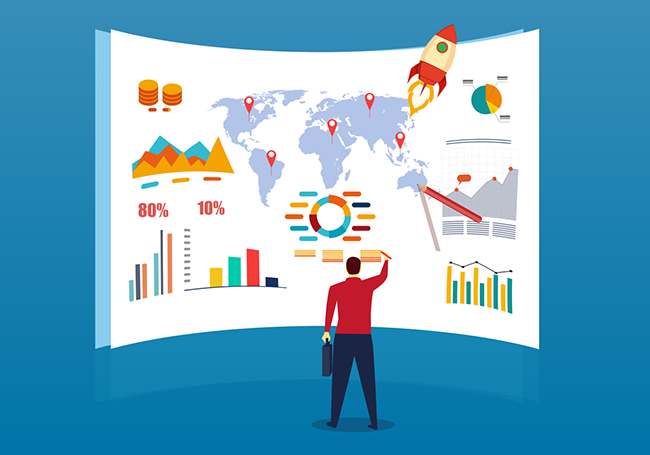

### Concatenate the training and testing dataset

In [40]:
df= pd.concat(objs=[train_df,test_df], ignore_index=True)

In [41]:
df.head()

,id,target,day,month,duration,contactid,age,gender,job,maritalstatus,education,creditfailure,accountbalance,house,credit,contacttype,numberofcontacts,numberofcontactslastcampaign,lastcampaignresult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,0,unknown


In [42]:
df.shape

(45211, 19)

**Rename the'target' column to 'converted'**
* The name 'target' is diificult to remember the dicrition of the column , So the name **'target'** is renamed as **'converted'**.

In [43]:
df.rename(columns={'target': 'converted'}, inplace=True)

## **Data Distribution of selected columns**

---



* Before performing EDA part, it is essential to explore data distribution. This  step helps understand the frequency distribution of each variable. At first we need to create a list of columns to skip in the loop for plotting histrograms. The columns,
 ['id', 'contactid','duration', 'job', 'numberofcontactslastcampaign', 'numberofcontacts', 'accountbalance', and 'education']

* after creating a list lets create a loop to iterate through the columns and generate histograms for each, skipping the specified columns using an if statement. Histograms helps to visualize the frequency distribution of each variable.






In [44]:
df.columns

Index(['id', 'converted', 'day', 'month', 'duration', 'contactid', 'age',
       'gender', 'job', 'maritalstatus', 'education', 'creditfailure',
       'accountbalance', 'house', 'credit', 'contacttype', 'numberofcontacts',
       'numberofcontactslastcampaign', 'lastcampaignresult'],
      dtype='object')

In [45]:
sns.set_style("whitegrid")

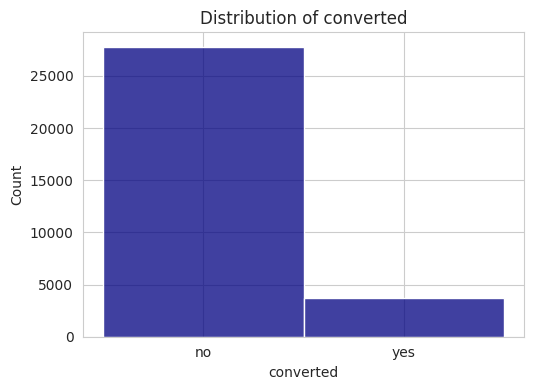

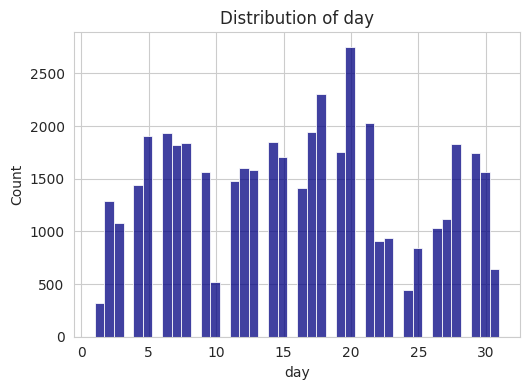

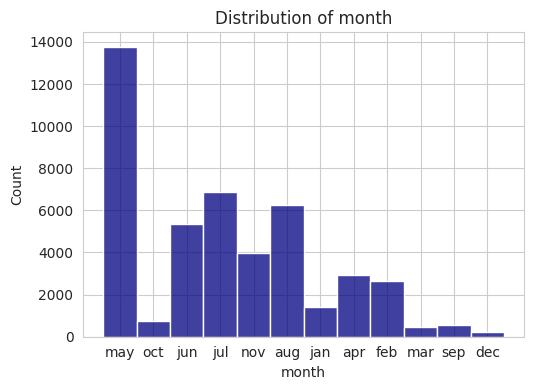

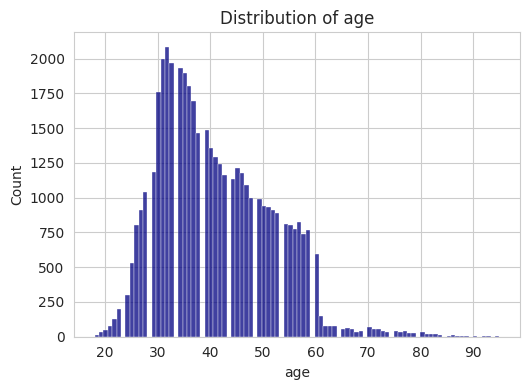

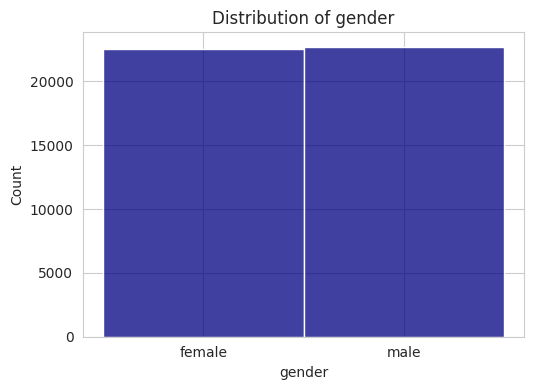

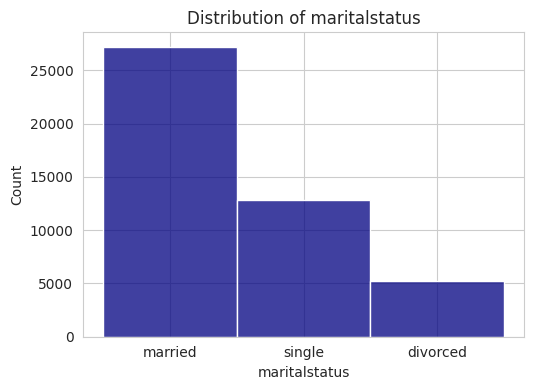

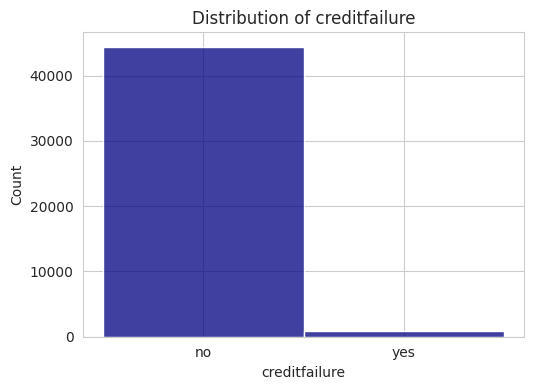

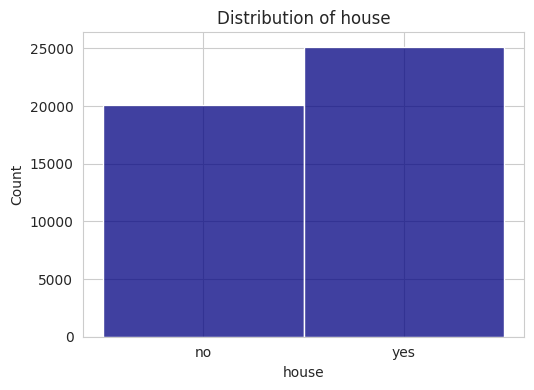

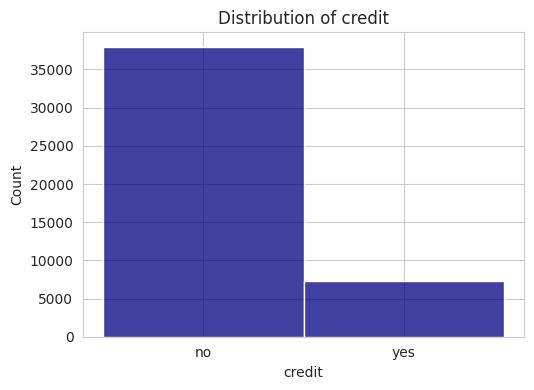

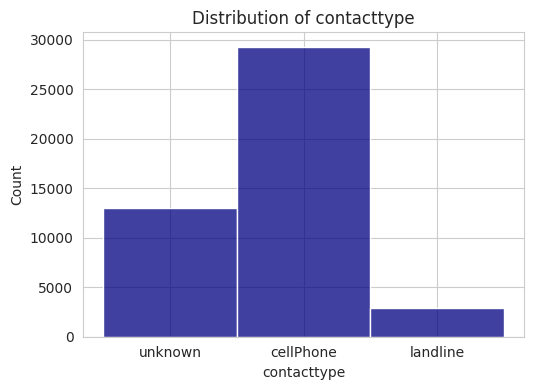

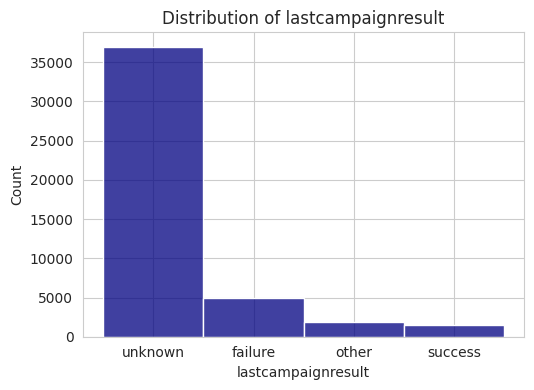

In [46]:
skip_columns = {'id','contactid','duration', 'job', 'numberofcontactslastcampaign' , 'numberofcontacts' , 'accountbalance' , 'education'}
for column in df.columns:
    if column in skip_columns :
        continue
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], color='navy')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

**Data Distribution Plots**

**1.Distribution of Conversion Status**
* This plot indicates the counts of people who responded positively to the current campaign. According to this plot, we can see that many people are not converted.

**2.Distribution of Days**
* This plot shows the counts of most days. The highest count in the plot is on the 20th.

**3.Distribution of Months**
* This plot shows which month has the highest counts of data. According to this plot, May has the most counts.



**5.Distribution of Age**
* This plot shows the count of ages of the customers. According to the plot, the majority of the customers are between 30-45 years old, indicating a middle-aged demographic.

**6.Distribution of Gender**
* This plot shows the counts of male and female customers. According to the plot, both male and female customers are almost equal in number.

**7.Distribution of Marital Status**
* This plot shows the marital status count of the customers. The majority of the customers are married, with a significant number being single.

**8.Distribution of Credit Failure**
* This plot shows the customers who have credit failures or not. According to the plot, the majority of the customers do not have credit failures.

**9.Distribution of House Ownership**
* This plot shows whether customers own a house or not. According to this plot, many people own houses, while the number of customers who do not own a house is also high but less than those who do.

**10.Distribution of Credit**
* This plot shows the count of people who currently have credit or not. We can see that the majority of the customers do not have credits currently.

**11.Distribution of Last Campaign Results**
* This plot shows the results of the previous campaign for customers. The majority of them are labeled 'unknown', indicating new customers or those who were not contacted in the last campaign. It is important to reduce the 'unknown' value to lower levels. Around 5000 customers experienced failure, and around 3000 had success in the previous campaign.


## **Gender vs Conversion**

---


* By using **sns.countplot()** we can create a count plot to show the number of male and female customers who converted versus those who didn't.

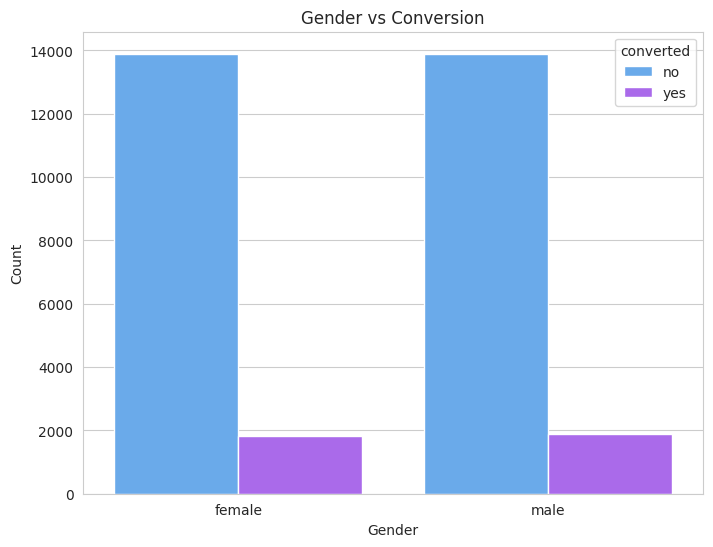

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='converted', data=df, palette='cool')
plt.title('Gender vs Conversion')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


* The count plot shows that the number of male and female customers who did not convert is quite equal. Similarly, the number of male and female customers who converted is also nearly equal. The majority of both male and female customers did not respond to the campaign.



## **Marital status vs Conversion** **and Marital status Distribution**

---



**Marital status dristribution**
* This pie chart shows the distribution of customers by their marital status.
* It uses **value_counts()** funtion to get the number of counts for each marital status and **plot(kind='pie')** function to create a pie chart.

**Marital status vs Conversion**
* This plot visualizes the relationship between marital status and conversion rates.
* The **sns.countplot()** function shows the count of converted and non-converted customers for each marital status category .
* The **'hue'** represent whether the customer converted or not.


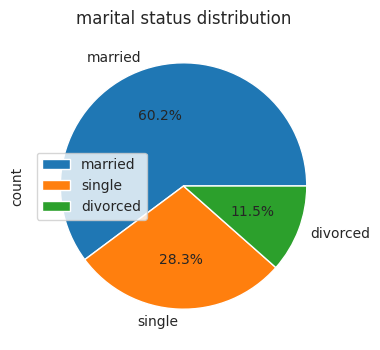

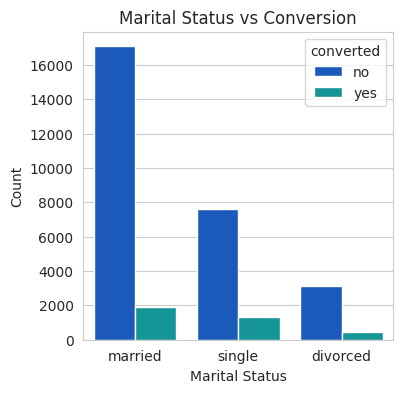

In [48]:
#pie chart
df['maritalstatus'].value_counts().plot(kind='pie',title='marital status distribution',autopct='%1.1f%%', figsize= (4,4))
plt.legend()
plt.show()

#count plot
plt.figure(figsize=(4,4))
sns.countplot(x='maritalstatus', hue='converted', data=df,palette='winter')
plt.title('Marital Status vs Conversion')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



* The pie chart shows that most customers are married, followed by single and divorced individuals. This insight helps to understand the overall customer base. The count plot further details this by showing how many customers in each marital status group converted versus those who did not. The Married individuals are the largest portion of the customer base and have the highest number of conversions while Single and divorced individuals come next respectively in terms of conversion numbers. To better understand the analysis, we should calculate the conversion rate for each marital status. The relationship between marital status and conversion rate can be analyzed in further analysis.

## **Age vs Conversion**

---


* By using sns.boxenplot() we can create a boxen plot to show the relationship between customers' age and their conversion status.


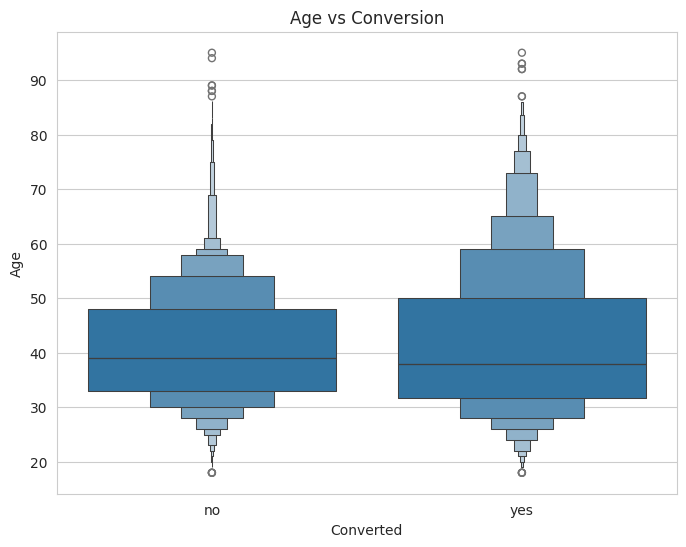

In [49]:
plt.figure(figsize=(8,6))
sns.boxenplot(x='converted', y='age', data=df)
plt.title('Age vs Conversion')
plt.xlabel('Converted')
plt.ylabel('Age')
plt.show()

**Calculating the mean and median values of the boxen plot**

In [50]:
c_med_age = df[df['converted'] == 'yes']['age'].median()
n_conv_med_age = df[df['converted'] == 'no']['age'].median()
c_mean_age = df[df['converted'] == 'yes']['age'].mean()
n_conv_mean_age = df[df['converted'] == 'no']['age'].mean()

print(f"median age for converted customers: {c_med_age}")
print(f"median age for non-converted customers: {n_conv_med_age}")
print(f"mean age for converted customers: {c_mean_age}")
print(f"mean age for non-converted customers: {n_conv_mean_age}")

median age for converted customers: 38.0
median age for non-converted customers: 39.0
mean age for converted customers: 41.73135135135135
mean age for non-converted customers: 40.829769618430525


* This plot helps identify which age groups are more likely to convert.The median age for converted customers is 38.0 years is slightly lower than the median age of 39.0 years for non-converted customers.There are outliers in the older age range so it is potential to focus on the targeted marketing strategies. Most customers, whether they converted or not,
fall between 30 and 45 years old, underscoring the importance of this demographic in marketing efforts aimed at maximizing conversion rates.

## **Job Distribution**

---



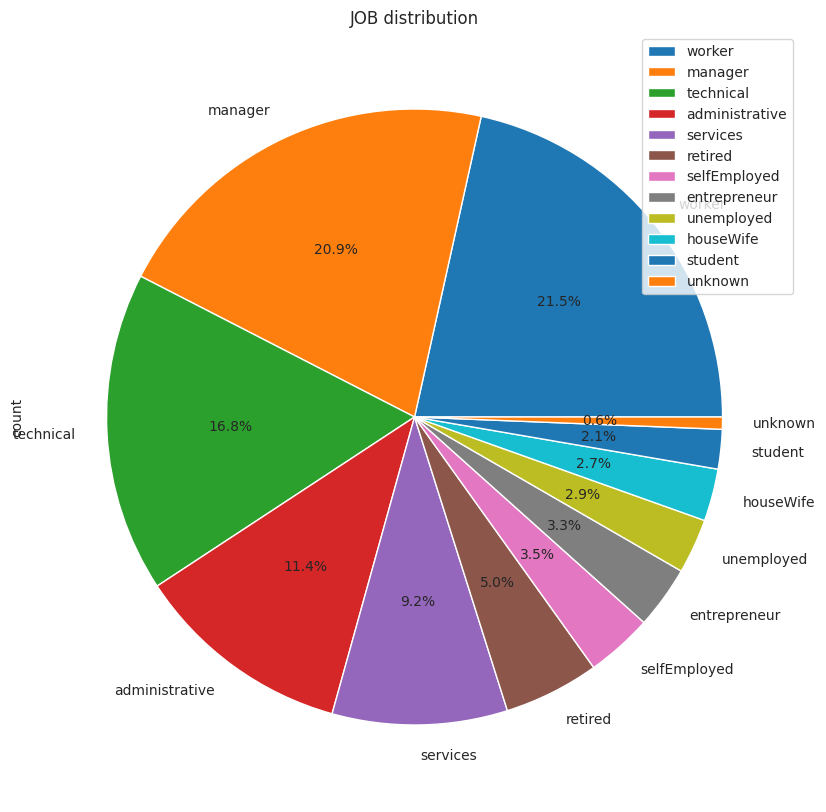

In [51]:
df['job'].value_counts().plot(kind='pie',title='JOB distribution',autopct='%1.1f%%', figsize= (10,10))
plt.legend()
plt.show()

* This pie chart shows the distribution of customers across different job categories.The most common jobs are workers, followed by managers and technical roles.

## **Last campaign results distribution**

---



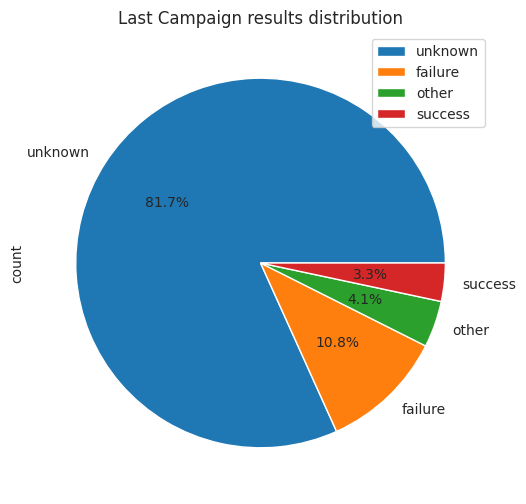

In [52]:
df['lastcampaignresult'].value_counts().plot(kind='pie',title='Last Campaign results distribution',autopct='%1.1f%%', figsize= (6,6))
plt.legend()
plt.show()

* This pie chart shows the distribution of outcomes from the last campaign.Majority of results are categorized as 'unknown' with 81% while successes make up 3.3%,
failures 10.8%, and 4.1% other.Understanding these results is key to improving future campaigns.

## **Education Distribution**

---



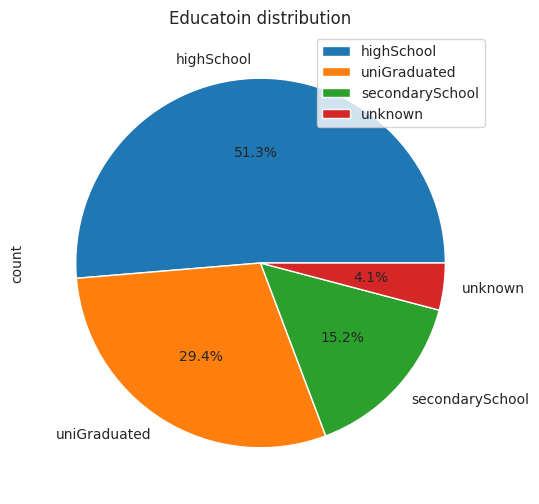

In [53]:
df['education'].value_counts().plot(kind='pie',title='Educatoin distribution',autopct='%1.1f%%', figsize= (6,6))
plt.legend()
plt.show()

* This pie chart shows the distribution of customers based on their education levels. The majority of customers have a university education with high school and secondary school graduates also in significant numbers.


## **Relationship between age vs contact duration** **and Distribution of Contact duration**


---

* By using **sns.lineplot()** function we can create a line plot which shows the relationship between customer ages and the duration of the contact during last campaign.
* By using **sns.histplot()** function we can create a histrogram which shows distribution of contact duration

* The plot aims to determine whether specific age groups tend to experience longer or shorter contact durations.

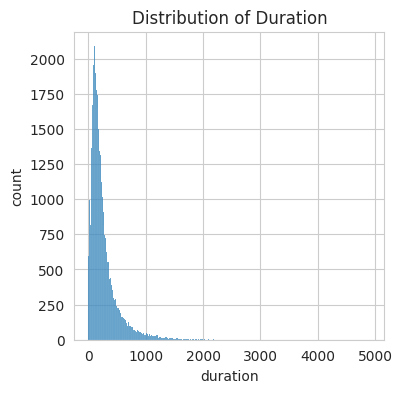

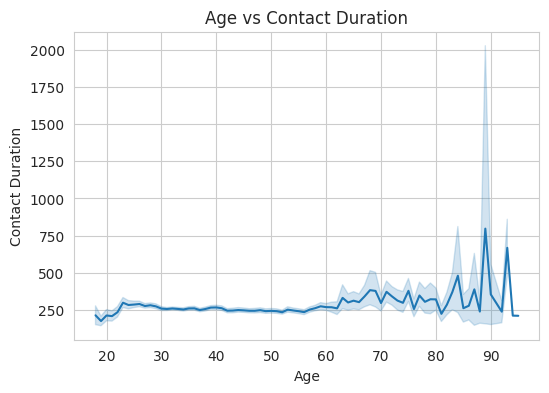

In [54]:
plt.figure(figsize=(4,4))
sns.histplot(x='duration', data=df)
plt.title('Distribution of Duration')
plt.xlabel('duration')
plt.ylabel('count')
plt.show()

plt.figure(figsize=(6,4))
sns.lineplot(x='age', y='duration', data=df)
plt.title('Age vs Contact Duration')
plt.xlabel('Age')
plt.ylabel('Contact Duration')
plt.show()

* The histogram shows that most contacts were short in duration with a few having longer durations. This plot suggests that optimizing shorter and impactful conversations could enhance campaign effectiveness.

* Meanwhile, the line plot shows a trend where younger customers aged 20 to 60 generally prefer shorter contact times while older customers aged 60 to 95 like to engage in longer conversations.

* Overall these two plots highlights that contact duration varies by age group, indicating that tailoring communication strategies based on age could improve customer engagement and campaign success.


## **Relationship between age and account balance**

---



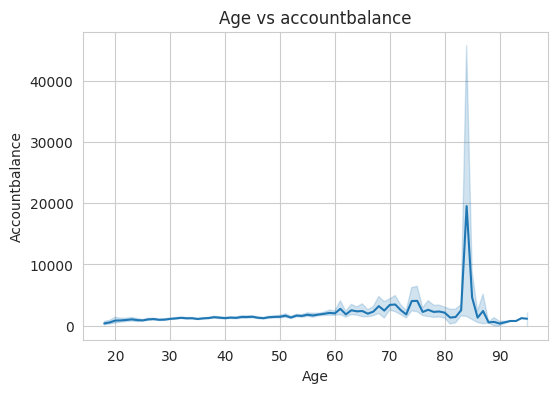

In [55]:
plt.figure(figsize=(6,4))
sns.lineplot(x='age', y='accountbalance', data=df)
plt.title('Age vs accountbalance')
plt.xlabel('Age')
plt.ylabel('Accountbalance')
plt.show()


* This line plot shows the distribution of account balances across different age groups. The plot shows that account balances vary widely among customers of different ages without a clear trend of higher or lower balances concentrated in specific age groups. The ages between 20 to 60 have a slight increase in account balance while ages between 60 to 95 change higher and lower at various ages but around age 85 it raises up to 2000 and gets down closer to 0 at age 90.

## **Customer Response and Campaign Analysis**

* Under this section we gonna explore customer behavior and their responses to marketing campaigns by analyzing specific questions related to the campaign.The aim of this analysis is to uncover actionable insights.







**Person who has highest account balance**
* By using **'accountbalance,max()'** function we can filter
 the row which has maximun value in the **accountbalance** column.

In [56]:
highest_balance=df[(df.accountbalance == df.accountbalance.max())]
highest_balance

,id,converted,day,month,duration,contactid,age,gender,job,maritalstatus,education,creditfailure,accountbalance,house,credit,contacttype,numberofcontacts,numberofcontactslastcampaign,lastcampaignresult
40459,432182336,NaN,3,jun,90,89498667,51,female,manager,single,uniGraduated,no,102127,no,no,cellPhone,1,0,unknown


* By identifying the customer with the highest account balance allows the campaign to provide presonalized offers and etention strategies tailored to this high-value customer. This will boost customer loyalty and encourage continued high spending, maximizing their contribution to the business.

**Number of people with success in last campaign results who do respond to the current campaign**

In [57]:
success_yes = df[(df['lastcampaignresult'] =='success')&(df['converted'] == 'yes')].shape[0]
print('number of people with success in last campaign results who do respond to the current campaign=',success_yes)

number of people with success in last campaign results who do respond to the current campaign= 664


* This code shows the number of customers who had a successful result in the last campaign and responded positively to the current campaign. 664 customers has responded to both last campaign and current campaign. It shows over 50% of the 1100 successful records in the previous campaign.It is essential to provide customized follow-up communications and special promotions to maintain customer loyalty.


**Number of people with success in last campaign results who did not respond to the current campaign**

In [58]:
success_not = df[(df.lastcampaignresult == 'success')&(df.converted == 'no')].shape[0]
print('number of people with success in last campaign results who did not respond to the current campaign=',success_not)

number of people with success in last campaign results who did not respond to the current campaign= 373


* This code calculates the number of customers who had a successful result in the last campaign but didn't respond positively in the current campaign. There are 373 customers who responded to the last campaign but did not respond positively to the current campaign. At first, we need to identify the reasons why they didn't respond to the campaign and need to improve those areas to increase customer trust in future campaigns.

**Number of people with failure in last campaign results who do respond to the current campaign**

In [59]:
failure_yes = df[(df['lastcampaignresult'] =='failure')&(df['converted'] == 'yes')].shape[0]
print('Number of people with failure in last campaign results who do respond to the current campaign=',failure_yes)

Number of people with failure in last campaign results who do respond to the current campaign= 439


* This code calculates the number of customers who had a failed result in the last campaign but responded positively in the current campaign. Out of around 3500 failure customers, only 439 customers have responded positively to the current campaign. To increase the number of customers in future campaigns we need to identify areas that needs to  be improved.

**Number of People with Failure in Last Campaign Results Who Did Not Respond to the Current Campaign**

In [60]:
failure_not = df[(df['lastcampaignresult'] =='failure')&(df['converted'] == 'no')].shape[0]
print('Number of People with Failure in Last Campaign Results Who Did Not Respond to the Current Campaign=',failure_not)

Number of People with Failure in Last Campaign Results Who Did Not Respond to the Current Campaign= 2964


* There are 2964 customers who haven't responded to both the previous and current campaigns. By understanding the reasons for non-response, we can gather insights from customers and develop strategies to improve conversion rates.

**The Person who has most number of contacts during the current campaign**

In [61]:
no_con = df[(df.numberofcontacts == df.numberofcontacts.max())]
no_con

,id,converted,day,month,duration,contactid,age,gender,job,maritalstatus,education,creditfailure,accountbalance,house,credit,contacttype,numberofcontacts,numberofcontactslastcampaign,lastcampaignresult
24553,432146677,no,19,may,124,54219206,45,male,manager,married,unknown,no,9051,yes,no,unknown,63,0,unknown


* This shows the customer who had the highest number of contacts during the current campaign, with a total of 63 contacts. Even 63 contacts didn't change the customers to respond positively to the current campaign.Efficiently managing contact efforts can improve the results in future campaigns.

**Number of people has a credit failure but resonded to the current campaign and Number of people has no credit failure but resonded to the current campaign**

In [62]:
credit_failure_yes = df[(df['converted'] == 'yes')&(df['creditfailure'] == 'yes')].shape[0]
credit_failure_no = df[(df['converted'] == 'yes')&(df['creditfailure'] == 'no')].shape[0]
print('Number of people has a credit failure but resonded to the current campaign=',credit_failure_yes)
print('Number of people has no credit failure but resonded to the current campaign=',credit_failure_no)

Number of people has a credit failure but resonded to the current campaign= 37
Number of people has no credit failure but resonded to the current campaign= 3663


* 37 customers with credit failures responded positively to the current campaign, alongside 3663 customers without credit failures.

**Number of people has credit failure but didn't resonded to the current campaign**

**Number of people has no credit failure and didn't resonded to the current campaign**

In [63]:
cred_fail_yes_not = df[(df['converted'] == 'no')&(df['creditfailure'] == 'yes')].shape[0]
cred_fail_no_not = df[(df['converted'] == 'no')&(df['creditfailure'] == 'no')].shape[0]
print('Number of people has credit failure but did not resonded to the current campaign=',cred_fail_yes_not)
print('Number of people has no credit failure and did not resonded to the current campaign=',cred_fail_no_not)

Number of people has credit failure but did not resonded to the current campaign= 518
Number of people has no credit failure and did not resonded to the current campaign= 27262


* 518 customers with credit failures and 27262 customers without credit failures did not engage with the campaign.

## **Conversion Rate**

---



* Customer conversion rate is an important metric in marketing analysis. It provides a good insight into whether a campaign is a success or not. A lower conversion rate does not mean a failed campaign. Every campaign provides valuable insights into customer behavior, which can be used to improve future strategies and get the best output from the next campaign.

* To calculate the conversion rate first you need to determine the number of unique customers **(converted_customer)** who have responded positively to the current campaign.Next, calculate the total number of unique customers **(total_customer)**. Divide converted_customer by total_customer, then multiply the result by 100 to get the conversion rate.

In [64]:
converted_customer = df[df['converted'] == "yes"]['id'].nunique()
total_customer = df['id'].nunique()

# conversion rate
conversion_rate = (converted_customer / total_customer) * 100
print(f"The number of customer who has coverted in the whole year is {converted_customer}")
print(f"The customer conversion rate in the whole year is {round(conversion_rate, 2)}%")

The number of customer who has coverted in the whole year is 3700
The customer conversion rate in the whole year is 8.18%


## **Monthly conversion rates and Monthly conversion count**

---



* First create a list of "months" in the correct order, so we can ensure that the moths are iterated in the 'for' loop sequentially. This is crucial for maintaining the correct order in visualizations.

* After creating the **'months'** list create two blank list named **"converted_counts=[]"**and **"conversion_rates=[]'**.

* Next Create a for loop for iterate through each month to calculate the number of converted customers and the conversion rate.

* Store these values in the blank lists which we created earlier, **"converted_counts=[]"**and **"conversion_rates=[]'** respectively.  

* After that create a dataframe for monthly data and plot the monthly data using a dual-axis **'ax = plt.twinx()'** **'sns.lineplot()'** lineplot.

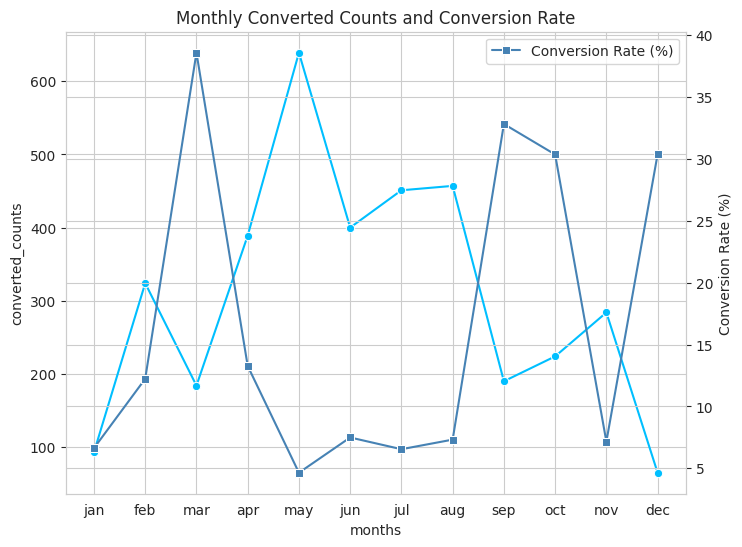

In [65]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
converted_counts = []
conversion_rates = []

for month in months:
    converted_customer = df[(df['month'] == month) & (df['converted'] == 'yes')]['id'].nunique()
    converted_counts.append(converted_customer)

    #conversion rate
    total_customer = df[df['month'] == month]['id'].nunique()
    conversion_rate = ((converted_customer / total_customer) *100)
    conversion_rates.append(conversion_rate)

#create a dataFrame
monthly_df = pd.DataFrame({'months': months, 'converted_counts': converted_counts, 'conversion_rate': conversion_rates})

#plotting
plt.figure(figsize=(8, 6))
sns.lineplot(x='months', y='converted_counts', data=monthly_df, marker='o', color='deepskyblue')
ax = plt.twinx()
sns.lineplot(x='months', y='conversion_rate', data=monthly_df, marker='s', color='steelblue', label='Conversion Rate (%)', ax=ax)
plt.title('Monthly Converted Counts and Conversion Rate')
plt.xlabel('Month Name')
plt.ylabel('Converted Counts')
ax.set_ylabel('Conversion Rate (%)')


plt.show()

* This dual-axis line plot displays the number of converted (responded positively to the current campaign) customers and the conversion rates for each month.
* The light blue line plot illustrates the relationship between conversion count and months, while the steel blue line plot represents the relationship between conversion rate and month.
* Most conversion counts occur in May, with around 750 customers. Specific months such as May, July, and August often exhibit higher conversion counts. However the highest conversion rate is in March at 40 percent while September, October, and December also have higher conversion rates at 33%, 30%, and 30%, respectively.
* The lowest conversion counts are in March, with around 200 customers but the conversion rate is the highest. Lowest conversion rates are observed in other months, such as January, February, June, July, August, and November. As we can see, higher customer counts generally correlate with lower conversion rates. Only on february and april has smaller gap between count and rate while in other months the gap is higher. Normally as customer counts increases conversion rates tend to slightly decreases. Even in the month with the highest conversion rate, there are only a few conversions, around 50.

* Our goal is to understand the plot and aim for an average conversion rate of 10-15%. To achieve this, understanding seasonality in customer conversions is crucial. By identifying high-conversion months, the marketing team can focus their efforts and resources during these periods to maximize impact. Conversely, strategies can be developed to improve engagement during low-conversion months.

## **Daily conversion rates and counts**

---



* First create a list of **'days'** ranging from 1 to 31 and two blank list named **"converted_daily_counts=[]"**and **"daily_conversion_rates=[]'**.

* Use a for loop to iterate through each day, calculating the number of converted customers and the daily conversion rate.

* Store these values in lists named **'converted_daily_counts=[]'** and **'daily_conversion_rates=[]'**.

* Create a DataFrame for daily data and plot this data using a dual-axis line plot with **'ax = plt.twinx()'** and **'sns.lineplot()'**.

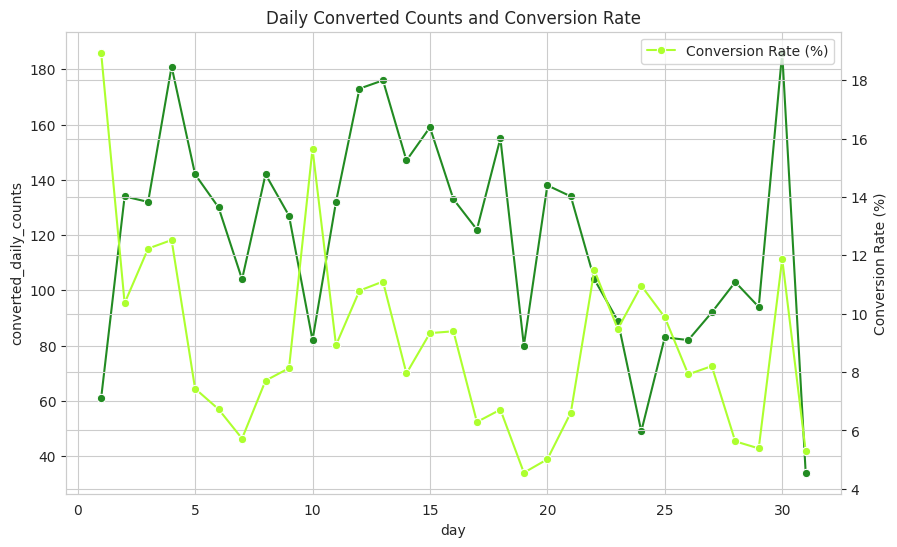

In [66]:
days = [day for day in range(1, 32)]
converted_daily_counts = []
daily_conversion_rates = []

for day in days:

    converted_daily_customer = df[(df['day'] == day) & (df['converted'] == 'yes')]['id'].nunique()
    converted_daily_counts.append(converted_daily_customer)

    #conversion rate
    total_customer = df[df['day'] == day]['id'].nunique()
    daily_conversion_rate = ((converted_daily_customer / total_customer) *100)
    daily_conversion_rates.append(daily_conversion_rate)

#create a dataFrame
daily_df = pd.DataFrame({'day': days, 'converted_daily_counts': converted_daily_counts, 'daily_conversion_rate': daily_conversion_rates})

#plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='day', y='converted_daily_counts', data=daily_df, marker='o', color='forestgreen')
ax = plt.twinx()
sns.lineplot(x='day', y='daily_conversion_rate', data=daily_df, marker='o', color='greenyellow', label='Conversion Rate (%)', ax=ax)
plt.title('Daily Converted Counts and Conversion Rate')
plt.xlabel('Day')
plt.ylabel('Converted Counts')
ax.set_ylabel('Conversion Rate (%)')


plt.show()

* This dual-axis line plot shows the daily conversion rates and daily converted customers for each day of the month. The darkgreen color lineplot shows the relationship between daily conversion count and of each day of the month while the light green line plot shows the daily conversion rate of each day of the month.
* Most  of the daily conversion counts are shown on  30th day, with around 180 customers, while the 4th, 12th, and 13th also have more than 160 customers. The highest conversion rate is shown on the 1st day of the month, with more than 19 percent conversion rates.
*  The lowest number of coverions and conversion rate are shown on 31st and 19th respectivelty. The reason why the conversion count is lower on the 31st is that only 7 months have 31 days. Other than that, the lowest number of conversions is shown on the 24th. In this plot, we can see that 7 days have more than 100 customer conversion counts with more than 10% conversion rates. When going through this plot  you can see that overall  just like the monthly plot, when customer conversion counts increase, it has a lower conversion rate.Moving forward, the campaign aims to uncover daily patterns, including weekend or holiday spikes, to minimize gaps between conversion counts and rates.Strategies include targeted promotions on high-performing days, tailored incentives for low-performing days, and dynamic campaign adjustments based on real-time analytics to boost overall effectiveness.

## **The same process is used for plotting the conversion rate is applied to the following plots.**

### **1. Conversion rate by job types(occupation)**

---



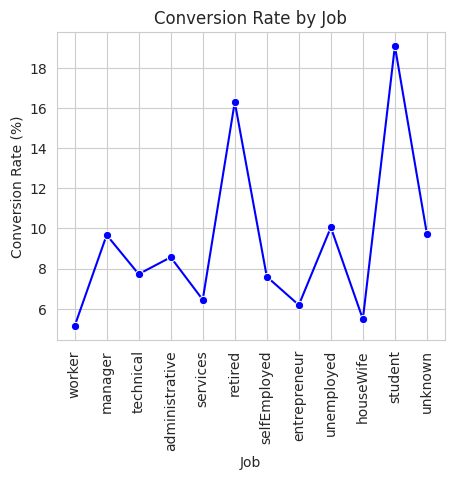

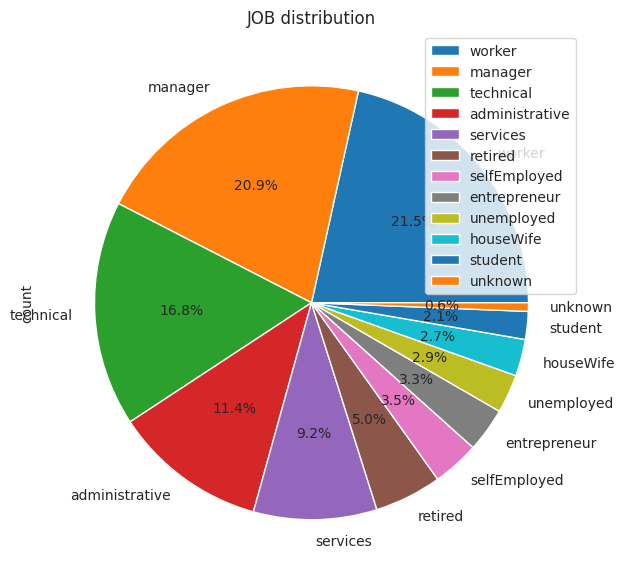

In [67]:
jobs = ['worker', 'manager', 'technical', 'administrative', 'services', 'retired', 'selfEmployed', 'entrepreneur', 'unemployed', 'houseWife', 'student', 'unknown']
job_conversion_rates = []

for job in jobs:
    converted_customers = df[(df['job'] == job) & (df['converted'] == 'yes')]['id'].nunique()
    total_customers = df[df['job'] == job]['id'].nunique()

    job_conversion_rate = (converted_customers/total_customers)*100
    job_conversion_rates.append(job_conversion_rate)

#create a dataFrame
job_df = pd.DataFrame({'job': jobs, 'conversion_rate': job_conversion_rates})
plt.figure(figsize=(5,4))
sns.lineplot(x='job', y='conversion_rate', data=job_df, marker='o', color='blue')
plt.title('Conversion Rate by Job')
plt.xlabel('Job')
plt.ylabel('Conversion Rate (%)')
plt.xticks(rotation=90)
plt.show()

#adding the job distribution
df['job'].value_counts().plot(kind='pie',title='JOB distribution',autopct='%1.1f%%', figsize= (7,8))
plt.legend()
plt.show()




* This line plot shows the conversion rates for different occupations. This plot helps us understand which job categories have higher conversion rates and can inform targeted marketing strategies. The highest conversion rate is shown in students with more than 19 percent while, retired customers has a good coversion rate of around 17 percent. The least number of conversion rates are shown in workers catergory with less than 5 percent. Also the house wife also has a lower percentage with around 5 percent. While students and retired customers have higher conversion rates, they represent only 2.1% and 5% of the job distribution. The 'Worker' category has the least conversion rate but represents the majority of customers, more than
 21.5%. The number of customers in the 'Manager' category represents around 21%, with a conversion rate almost close to 10%. The number of unknown job customers represents less than 1% of the data but has a successful rate of around 10%.
 This indicates that a higher customer conversion rate does not necessarily provide a good insight. we need to deeply understand the patterns and provide better marketing strategies to engage those segments in the future.

 * While the student, retired and manager categories shows strong insights, so we can offer special promotions or introduce products that cater to these job types to boost future campaigns. Also we should focus on improving conversion rates for low-count and low-rate job categories by introducing new plans tailored to their needs.

### **2. Conversion rate** **by Contact type**

---



In [68]:
df['contacttype'].value_counts()

contacttype
cellPhone    29285
unknown      13020
landline      2906
Name: count, dtype: int64

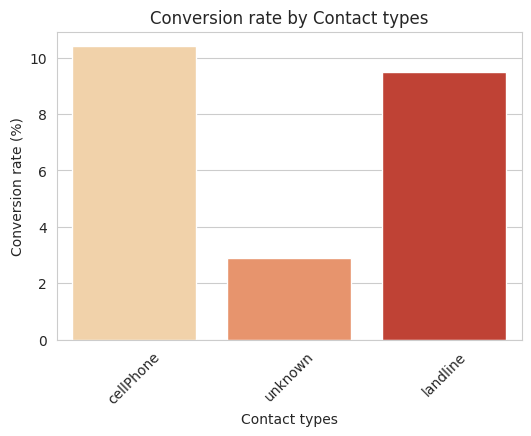

In [69]:
conty = ['cellPhone','unknown','landline']
conty_conversion_rates = []

for contacttype in conty:
    converted_customers = df[(df['contacttype'] == contacttype) & (df['converted'] == 'yes')]['id'].nunique()
    total_customers = df[df['contacttype'] == contacttype]['id'].nunique()

    conty_conversion_rate = (converted_customers/total_customers)*100
    conty_conversion_rates.append(conty_conversion_rate)

#create a dataFrame
conty_df = pd.DataFrame({'contacttype':conty,'conty_conversion_rate': conty_conversion_rates})
plt.figure(figsize=(6, 4))
sns.barplot(x='contacttype', y='conty_conversion_rate', data=conty_df, hue='contacttype', palette='OrRd')
plt.title('Conversion rate by Contact types')
plt.xlabel('Contact types')
plt.ylabel('Conversion rate (%)')
plt.xticks(rotation=45)
plt.show()

* This bar plot illustrates the effectiveness of different contact methods in converting customers. This plot reveals which methods are more successful in driving conversions. The highest conversion rate is the customers who use cell phones as their contact type with more than 10%. Also when we plot the distribution of contacttype we identify the majority of customers use cell phones with over 26000 customers. Conversely, customers who use landlines represent the least number of customers around 2500 but, exhibit a notable conversion rate of over 8%. This shows that fewer customers can still produce a good conversion rate. The least conversion rate is shown by the 'unknown' category, with around 3% of the conversion rate, also when ploting contact type distribution we identify over 10,000 customers.
* By understanding this plot, we can identify the highest conversion rate, suggesting that personal, direct contact is more effective. Understanding which contact methods are most effective for successful communication channels.

### **3. Convertion rate by Marital status**

---



In [70]:
df['maritalstatus'].value_counts()

maritalstatus
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

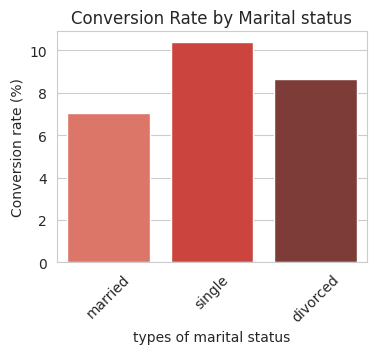

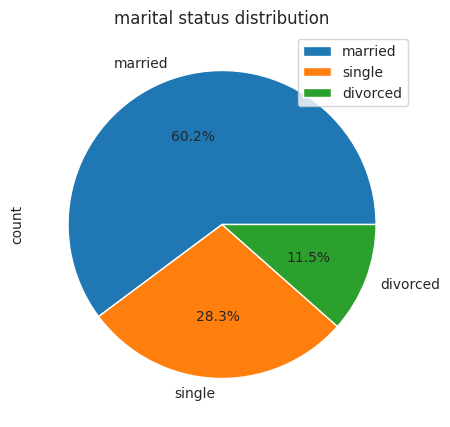

In [71]:
ms = ['married','single','divorced']
ms_conversion_rates = []

for maritalstatus in ms:
    converted_customers = df[(df['maritalstatus'] == maritalstatus) & (df['converted'] == 'yes')]['id'].nunique()
    total_customers = df[df['maritalstatus'] == maritalstatus]['id'].nunique()

    ms_conversion_rate = (converted_customers/total_customers)*100
    ms_conversion_rates.append(ms_conversion_rate)

#create a dataFrame
ms_df = pd.DataFrame({'maritalstatus': ms, 'ms_conversion_rate': ms_conversion_rates})
plt.figure(figsize=(4, 3))
sns.barplot(x='maritalstatus', y='ms_conversion_rate', data=ms_df, hue='maritalstatus', palette='Reds_d')
plt.title('Conversion Rate by Marital status')
plt.xlabel('types of marital status')
plt.ylabel('Conversion rate (%)')
plt.xticks(rotation=45)
plt.show()

#adding marital status distribution plot
#pie chart
df['maritalstatus'].value_counts().plot(kind='pie',title='marital status distribution',autopct='%1.1f%%', figsize= (6,5))
plt.legend()
plt.show()

* This plot shows the distribution of customers by marital status, while the pie chart shows the distribution of customers by marital status. 'single' customers exhibit the highest conversion rate with more than 10% and represent the majority of the customer base. The married customers have the lowest conversion rate with around 7% rate , representing more than 60% of the customers. The 'divorced ' customers have a conversion rate of more than 8% but I only represent 11.5% of the customers. To enhance engagement, the marketing team should focus on developing targeted campaigns for specific individuals. It can help refine marketing strategies in future campaigns.

# **3.Data Preprocessing**

### **Define x_train, y_train , x_test and y_test**

* At first train_test_split method is applied for the train dataset


In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(encoded_train_df.drop(columns=['target'],axis=1), encoded_train_df['target'], test_size=0.2, random_state=42)

In [73]:
x_train

,id,day,month,duration,contactid,age,gender,creditfailure,accountbalance,house,...,education_secondarySchool,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown
10540,15306,19,8,132,10539,12,1,0,3119,0,...,0,0,0,1,0,0,0,0,0,1
1675,8680,29,6,176,1675,31,0,0,1041,0,...,1,0,0,0,0,1,0,0,0,1
13814,28235,29,7,141,13811,14,0,0,1827,0,...,0,0,1,1,0,0,0,0,0,1
119,11501,22,7,81,119,12,0,0,1347,1,...,0,1,0,1,0,0,0,0,0,1
18884,2363,14,5,422,18880,25,0,0,5536,1,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,28242,3,8,642,29798,39,1,0,2459,0,...,0,1,0,1,0,0,0,0,0,1
5390,6971,8,6,115,5390,17,0,0,811,0,...,0,0,0,0,0,1,0,0,0,1
860,29508,3,12,696,860,55,0,0,4728,0,...,1,0,0,1,0,0,0,0,0,1
15795,26367,13,5,107,15792,17,1,0,1289,1,...,0,1,0,1,0,0,1,0,0,0


In [74]:
y_train

10540    0
1675     0
13814    0
119      0
18884    0
        ..
29802    1
5390     0
860      1
15795    0
23654    0
Name: target, Length: 25184, dtype: int64

In [75]:
x_test

,id,day,month,duration,contactid,age,gender,creditfailure,accountbalance,house,...,education_secondarySchool,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown
30909,27393,21,5,158,30904,31,0,0,1188,0,...,0,1,0,1,0,0,1,0,0,0
15499,24166,4,5,81,15496,17,1,0,1549,1,...,0,0,0,1,0,0,0,0,0,1
16466,4819,27,5,207,16463,8,1,0,530,1,...,0,0,0,0,0,1,0,0,0,1
23318,5020,28,5,162,23314,31,1,0,1077,1,...,0,0,0,0,0,1,0,0,0,1
8931,20554,2,2,192,8931,16,0,0,1238,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,13392,5,8,720,1743,17,1,0,957,0,...,0,1,0,1,0,0,0,0,0,1
23209,7011,10,6,88,23205,17,0,0,1045,0,...,1,0,0,0,0,1,0,0,0,1
14897,29661,12,1,260,14894,13,0,0,1141,0,...,0,1,0,1,0,0,0,0,1,0
8765,11466,22,7,1232,8765,37,1,0,371,1,...,0,1,0,1,0,0,0,0,0,1


In [76]:
y_test

30909    0
15499    0
16466    0
23318    0
8931     0
        ..
1743     1
23209    0
14897    1
8765     0
4950     0
Name: target, Length: 6296, dtype: int64

### **Scale the dataset using MinMaxScaler**


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)



# **4.Create a Model**

###**Linear Regression**

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
reg = LinearRegression()
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [79]:
reg_score =reg.score(x_test_scaled,y_test)
print(reg_score)

0.2952754492990458


In [80]:
from sklearn.model_selection import cross_val_score
reg_cvs= cross_val_score(reg, x_train_scaled, y_train, cv=5).mean()
print(reg_cvs)

0.3210227108161097


### **Random Forest classifier**




In [81]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [82]:
forest_score=forest.score(x_test_scaled,y_test)
print(forest_score)

0.908831003811944


In [83]:
forest_cvs= cross_val_score(forest, x_train_scaled, y_train, cv=5).mean()
print(forest_cvs)

0.9084341717202158


### **Gradient Boosting Classifier**

In [84]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train_scaled, y_train)

GradientBoostingClassifier()

In [85]:
gbc_score=gbc.score(x_test_scaled,y_test)
print(gbc_score)

0.9132782719186785


In [86]:
gbc_cvs= cross_val_score(gbc, x_train_scaled, y_train, cv=5).mean()
print(gbc_cvs)

0.913159442997119


### **XGB Classifier**

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [88]:
xgb_score = xgb.score(x_test_scaled,y_test)
print(xgb_score)

0.9086721728081322


In [89]:
xgb_cvs= cross_val_score(xgb, x_train_scaled, y_train, cv=5).mean()
print(xgb_cvs)

0.9092283898200181


**Creating a data frame to store the accuary scores from each models**

In [90]:
accuarcy_score = pd.DataFrame([['Linear Regression', reg_score],
                              ['Rondom Foresr Classifier', forest_score],
                              ['Gardient Boosting classifier', gbc_score],
                              ['XGBoost', xgb_score]],
                             columns=['Model', 'Accuracy'])



### Accuarcy scores

In [91]:
print(accuarcy_score)

                          Model  Accuracy
0             Linear Regression  0.295275
1      Rondom Foresr Classifier  0.908831
2  Gardient Boosting classifier  0.913278
3                       XGBoost  0.908672


**Creating a data frame to store the cross-value_score from each models**

In [92]:
cv_scores = pd.DataFrame([
    ['Linear Regression', reg_cvs],
    ['Random Forest Classifier', forest_cvs],
    ['Gradient Boosting Classifier', gbc_cvs],
    ['XGBoost', xgb_cvs]],
    columns=['Model', 'Cross-Validation'])


In [93]:
print(cv_scores)

                          Model  Cross-Validation
0             Linear Regression          0.321023
1      Random Forest Classifier          0.908434
2  Gradient Boosting Classifier          0.913159
3                       XGBoost          0.909228


 * Since Gradient Boosting classifier has the best accuarcy score and the cross validation score let's predict y values using GBC model.

**Gradient Boosting classifier to Prediction**

In [94]:
y_pred = gbc.predict(x_test_scaled)

 **Finding R2 score, MSE(Mean Squared Error), Precision score, Recall score and F1 score**

**Import the relavent libraries**

In [95]:
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, precision_score, recall_score, f1_score

In [96]:
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Recall Score: {recall_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred)}')

R2 Score: 0.13958070523217392
Mean Squared Error: 0.08672172808132148
Accuracy Score: 0.9132782719186785
Precision Score: 0.6366559485530546
Recall Score: 0.553072625698324
F1 Score: 0.5919282511210763


### **Use the Gardient boosting classifier to the encoded_test_df**

*   At first we have to drop the 'target' column from the dataset.

*  After that use predict() function to predict values for 'target' column

*   At Next store those values in the dataframe by creating a new column (predicted_target)







In [97]:
# Predict on test data
encoded_test_df_processed = encoded_test_df.drop(columns=['target'])
encoded_test_df_processed = pd.DataFrame(scaler.transform(encoded_test_df_processed), columns=encoded_test_df_processed.columns)

* Becuase of feature names issue we have covert to numpy array

In [98]:
encoded_test_df_processed_np = encoded_test_df_processed.values

In [99]:
test_predictions = gbc.predict(encoded_test_df_processed_np)

In [100]:
encoded_test_df['predicted_target'] = test_predictions

In [101]:
encoded_test_df.head()

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown,predicted_target
0,10487,0,4,5,282,0,17,1,0,642,...,1,0,1,0,0,1,0,0,0,0
1,4624,0,17,7,110,1,13,1,0,1123,...,1,0,1,0,0,0,0,0,1,0
2,8669,0,28,1,474,2,8,1,0,1797,...,1,0,0,1,0,0,0,0,1,0
3,2802,0,4,6,208,3,8,1,0,1535,...,0,0,0,0,1,0,0,0,1,0
4,7716,0,17,11,458,4,14,1,0,3259,...,0,0,1,0,0,0,0,0,1,0


* Checking wether the prediction is success

In [102]:
encoded_test_df['predicted_target'].value_counts()

predicted_target
0    13304
1      427
Name: count, dtype: int64

## **5.Prescriptive Analytics**

---

* Prescriptive analytics is a type of data analysis that helps in suggesting the best actions to improve results. Also by using prescriptive anaysis to targeted campaigns can achieve higher conversion rates and better return on investment(ROI). In this section we will discuss two prescriptive methods and how we can use them to data driven decisions.

**1.Recommendation Systems**
* For this supermarket, we can use machine learning algorithms to recommend products by identifying each customer's weekly or monthly purchases. ⁤⁤By analyzing purchase history and preferences the system can detect patterns and notify customers if they have not bought certain products in their usual weekly routine. ⁤⁤This will not only improve the shopping experience but also increase the chance of customers finding and purchasing interested items. ⁤⁤This personalized reminder can help ensure that customers do not miss any of their preferred items. ⁤⁤This approach can lead to higher basket sizes and repeat purchases, boosting sales. ⁤

**2.Rule based Systems**
* Rule based systems use a set of predefined rules to make decisions or recommendations for specific conditions. These rules are often taken from expert knowledge or past data and give a clear and structured approach to decision-making. For this supermarket campaign we can use rule based system to offer personalized offers , discounts to customers based on their account balance.

  * if the customer acount balance is higher than 5000 the custmoer wil rewarded 20% discount.
  * if the customer acount balance is higher than 2500 and less than 5000 the customer will get rewarded 15% discount.
  * if the customer acount balance is higher than 1000 and less than 2500 the customer will get rewarded 10% discount.
  * if the customer acount balance is higher than 500 and less than 1000 the customer will get rewarded 5% discount.
  * if the customer acount balance is less than 500 the customer will get rewarded 2.5% discount.
  

* Using rule-based systems for the supermarket can increase customer satisfaction by offering tailored discounts and helping to find loyal customers. Also, it will lead the customers to keep higher balances.  By identifying the loyal customers we can provide promotions for the latest products as well. This approach will encourage the customers as well as boost the marketing campaign.


In [103]:
def offer_on_balance(customer):
    if customer['accountbalance'] > 5000:
        return '20% discount for higher account balance'
    elif customer['accountbalance'] > 2500:
        return '15% discount for moderate account balance'
    elif customer['accountbalance'] > 1000:
        return '10% discount for average account balance'
    elif customer['accountbalance'] > 500:
        return '5% discount for low account balance'
    else:
        return '2.5% discount for very low account balance'

In [104]:
encoded_train_df['balance_offer'] = encoded_train_df.apply(offer_on_balance, axis=1)
encoded_test_df['balance_offer'] = encoded_test_df.apply(offer_on_balance, axis=1)


In [105]:
encoded_train_df.head()

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_uniGraduated,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown,balance_offer
0,4470,0,26,5,166,0,12,0,0,610,...,0,0,0,0,1,0,0,0,1,5% discount for low account balance
1,29184,0,25,10,183,1,24,0,0,3170,...,1,0,1,0,0,0,0,0,1,15% discount for moderate account balance
2,27912,0,4,6,227,2,8,0,0,2911,...,0,0,0,1,0,0,0,0,1,15% discount for moderate account balance
3,5676,0,1,6,31,3,16,1,1,886,...,1,0,0,0,1,0,0,0,1,5% discount for low account balance
4,2403,0,14,5,1178,4,30,1,0,1370,...,0,0,0,0,1,0,0,0,1,10% discount for average account balance


In [106]:
encoded_test_df.head()

,id,target,day,month,duration,contactid,age,gender,creditfailure,accountbalance,...,education_unknown,contacttype_cellPhone,contacttype_landline,contacttype_unknown,lastcampaignresult_failure,lastcampaignresult_other,lastcampaignresult_success,lastcampaignresult_unknown,predicted_target,balance_offer
0,10487,0,4,5,282,0,17,1,0,642,...,0,1,0,0,1,0,0,0,0,5% discount for low account balance
1,4624,0,17,7,110,1,13,1,0,1123,...,0,1,0,0,0,0,0,1,0,10% discount for average account balance
2,8669,0,28,1,474,2,8,1,0,1797,...,0,0,1,0,0,0,0,1,0,10% discount for average account balance
3,2802,0,4,6,208,3,8,1,0,1535,...,0,0,0,1,0,0,0,1,0,10% discount for average account balance
4,7716,0,17,11,458,4,14,1,0,3259,...,0,1,0,0,0,0,0,1,0,15% discount for moderate account balance


**Save the updated dataset**

In [107]:
encoded_train_df.to_csv('/content/train.csv', index=False)
encoded_test_df.to_csv('/content/test.csv', index=False)

### **Importance of data analytics in driving data-driven decision making**

---


*  Data analytics enhance supermarkets to achieve better decision accuracy by providing deeper insights into consumer behavior and preferences.  Analyzing large data sets helps supermarkets discover valuable insights into consumer behavior, preferences and trends.  This helps supermarkets tailor marketing strategies, offer personalized offers and product recommendations that resonate with individual customers. This not only enhances customer satisfaction but also improves marketing strategies.
* Despite the advantages that come with data analytics, they are also associated with ethics and other issues of bias that need to be well handled. Organisations need to make sure that they have the right permission to gather and process customer information and should let their customers know how the information is going to be used to maintain privacy and data integrity. The protection of customer data from breaches and cyber-attacks is very important. Supermarkets require proper security systems that will ensure protection of the collected information and customer’s confidentiality. Also, there is a constant threat of algorithmic biases that emerge if the data feeding the analytics models contain biases from the past. It is therefore important to deal with these biases in order to avoid cases of unfair marketing to some of the customer segments. Finally, businesses need to effectively address the issue of data quality to support their analytics as data quality issues can substantially distort analytics and lead to poor decisions. With these ethical contingencies and possible biases in mind, the business community can use data analytics in a moral and efficient way to support ethical data decision making.